In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# useful webs:
# latex font: https://texblog.org/2012/08/29/changing-the-font-size-in-latex/
# plot marker: https://stackoverflow.com/questions/8409095/matplotlib-set-markers-for-individual-points-on-a-line
# LaTeX for Jupyther: https://www.mathjax.org/

In [3]:
# import datasets
# One Variable
ex1data1 = pd.read_csv("ex1data1.txt", header=None, names=['cityPopulation', 'foodTruckProfit'])
# Multiple Variables
ex1data2 = pd.read_csv("ex1data2.txt", header=None)
ex1data1.head()

,cityPopulation,foodTruckProfit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
ex1data1.describe()

,cityPopulation,foodTruckProfit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [5]:
ex1data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
cityPopulation     97 non-null float64
foodTruckProfit    97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [6]:
ex1data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


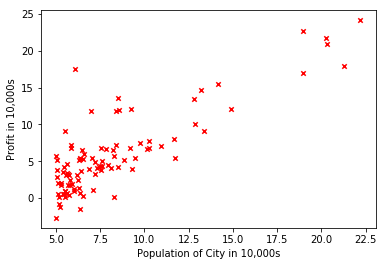

In [7]:
# Starting with only one variable
ex1data1.plot(kind='scatter', x='cityPopulation', y='foodTruckProfit', marker='x', color='r')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in 10,000s")
plt.show()

In [8]:
print(np.corrcoef(ex1data1.cityPopulation, ex1data1.foodTruckProfit))
# shows good correlation (more population, more people buy food -> more profit)

[[1.         0.83787323]
 [0.83787323 1.        ]]


In [9]:
# Create variables X and y
#X = np.array(ex1data1.iloc[:,0])
#y = np.array(ex1data1.iloc[:,1])
#m = len(y)

### Objective of Linear Regression: minimize the Cost Function
\begin{equation*}
\Large
J(\theta) = \frac{1}{2m} \sum_{n=1}^m \left( h_\theta (x^{(i)}) - y^{(i)} \right)^2
\end{equation*}

### Hypothesis for the linear model
\begin{equation*}
\Large
h_\theta (x) = \theta^Tx = \theta_0 + \theta_1x_1
\end{equation*}

### Gradient Descent
\begin{equation*}
\Large
\theta_j := \theta_j - \alpha\frac{1}{m} \sum_{n=1}^m \left( h_\theta (x^{(i)}) - y^{(i)} \right)x_j^{(i)}
\end{equation*}

In [10]:
theta = np.array([[0],[0]])
iterations = 1500
alpha = 0.01

In [11]:
ex1_n=ex1data1.values
m=len(ex1_n[:,1])
X=np.append(np.ones((m,1)), ex1_n[:,0].reshape(m,1), axis=1)
y=ex1_n[:,1].reshape(m,1)
theta=np.zeros((2,1))
print(theta)

[[0.]
 [0.]]


In [12]:
# define the cost function
def computeCost(X, y, theta):
    m = len(y)
    J = 0
    h = X.dot(theta)
    sq_er = (h-y)**2
    J = 1/(2*m) * np.sum(sq_er)
    return J

In [18]:
# define the Gradient Descent
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    
    for i in range(num_iters):
        h = X.dot(theta)
        error = np.dot(X.transpose(),(h - y))
        descent = alpha * 1/m * error
        theta -= descent
        J_history.append(computeCost(X,y,theta))
    return theta, J_history

In [14]:
computeCost(X,y,theta)

32.072733877455676

In [15]:
computeCost(X,y,np.array([[-1],[2]]))

54.24245508201238

In [16]:
# Running Gradient Descent
theta,J_history = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


In [17]:
predict1 = np.dot(theta.transpose(),np.array([1,3.5]))
predict1[0]*10000

4519.7678677017675

In [19]:
predict2 = np.dot(theta.transpose(), np.array([1,7]))
predict2[0]*10000

45342.45012944714

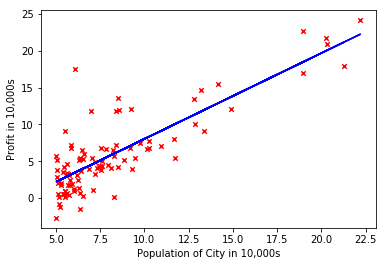

In [38]:
# Plot the fitted line after theta vector
f = lambda x: theta[0] + theta[1]*x
x = np.array(ex1data1['cityPopulation'])
y = [f(i) for i in x]
ex1data1.plot(kind='scatter', x='cityPopulation', y='foodTruckProfit', marker='x', color='r')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in 10,000s")
plt.plot(x, y, c="blue")
plt.show()